# Họ và Tên: Phạm Thế Hùng
# MSSV: 2374802010164

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


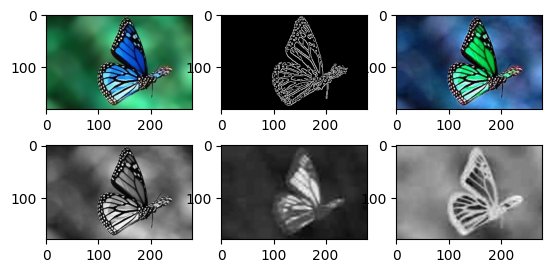

In [ ]:
import cv2
import imageio.v2 as iio
import matplotlib.pylab as plt
# sử dụng Bilateral filter để làm mịn ảnh
img = cv2.imread('my_image.jpg')
bilateral = cv2.bilateralFilter(img, 15, 75, 75)
cv2.imwrite('my_image_bilateral.jpg', bilateral)
#sử dụng Canny Edge Detection để xác định biên của hình ảnh
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 100, 200)
#Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG)
swapped = img.copy()
swapped[:, :, [1, 2]] = swapped[:, :, [2, 1]]
cv2.imwrite('my_image_swapped.jpg', swapped)
# Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)
cv2.imwrite('my_image_Y.jpg', y)
cv2.imwrite('my_image_Cr.jpg', cr)
cv2.imwrite('my_image_Cb.jpg', cb)

plt.subplot(3,3,1)
plt.imshow(bilateral, cmap="gray")
plt.subplot(3,3,2)
plt.imshow(canny, cmap="gray")
plt.subplot(3,3,3)
plt.imshow(swapped, cmap="gray")
plt.subplot(3,3,4)
plt.imshow(y, cmap="gray")
plt.subplot(3,3,5)
plt.imshow(cr, cmap="gray")
plt.subplot(3,3,6)
plt.imshow(cb, cmap="gray")

plt.show()

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


Z: Zoom
T: Xoay ngẫu nhiên
H: Lật ngang
V: Lật dọc
C: Cắt giữa
P: Thêm viền
Đã lưu: result_padding_image1.jpg


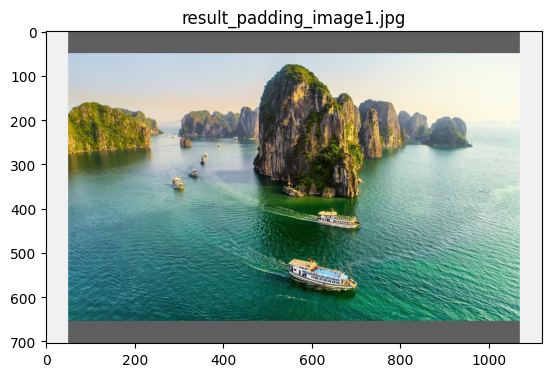

Đã lưu: result_padding_image2.jpg


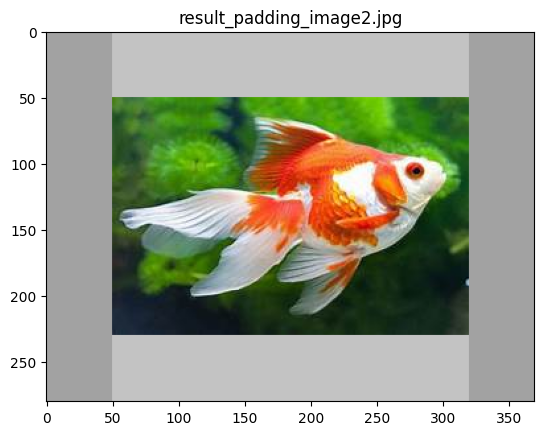

Đã lưu: result_padding_image3.jpg


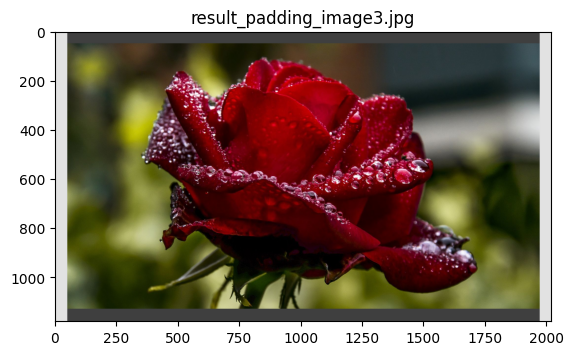

In [20]:
import imageio.v2 as iio
import scipy.ndimage as nd
import numpy as np
import random
import matplotlib.pyplot as plt

# Phóng to ảnh (Zoom bằng resize)
def zoom_image(img):
    print("Kích thước ảnh gốc:", img.shape)
    result = nd.zoom(img, (2, 2, 1))
    print("Kích thước ảnh sau khi zoom:", result.shape)
    return result


# Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
def rotate_image(img):
    angle = random.randint(0, 360)
    return nd.rotate(img, angle, reshape=False)

# Lật ảnh ngang (0.5 điểm) 
def lat_ngang(img):
    return img[:, ::-1, :]

# Lật ảnh dọc 
def lat_doc(img):
    return img[::-1, :, :]

# Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh)
def crop(img):
    h, w = img.shape[0:2]
    ch, cw = int(h * 0.5), int(w * 0.5)
    start_y = h // 2 - ch // 2
    start_x = w // 2 - cw // 2
    return img[start_y:start_y+ch, start_x:start_x+cw]

# Thêm viền (padding màu ngẫu nhiên)
def padding(img):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return np.pad(img, ((50, 50), (50, 50), (0, 0)), mode='constant', constant_values=((r, r), (g, g), (b, b)))

images = ["image1.jpg", "image2.jpg", "image3.jpg"]
print("Z: Zoom")
print("T: Xoay ngẫu nhiên")
print("H: Lật ngang")
print("V: Lật dọc")
print("C: Cắt giữa")
print("P: Thêm viền")
key = input("Nhập phím (Z/T/H/V/C/P): ").upper()

for filename in images:
    img = iio.imread(filename)

    if key == 'Z':
        result = zoom_image(img)
        method = 'zoom'
    elif key == 'T':
        result = rotate_image(img)
        method = 'rotate'
    elif key == 'H':
        result = lat_ngang(img)
        method = 'lat_ngang'
    elif key == 'V':
        result = lat_doc(img)
        method = 'lat_doc'
    elif key == 'C':
        result = crop(img)
        method = 'crop'
    elif key == 'P':
        result = padding(img)
        method = 'padding'
    else:
        print("Phím không hợp lệ!")
        break

    out_name = f"result_{method}_{filename}"
    iio.imwrite(out_name, result)
    print(f"Đã lưu: {out_name}")
    plt.imshow(result)
    plt.title(out_name)
    plt.show()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


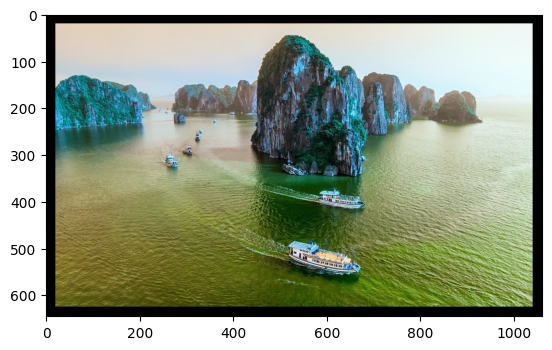

Kích thước ảnh gốc: (180, 270)
Kích thước ảnh sau khi xoay và phóng to 1.5 lần: (477, 477)


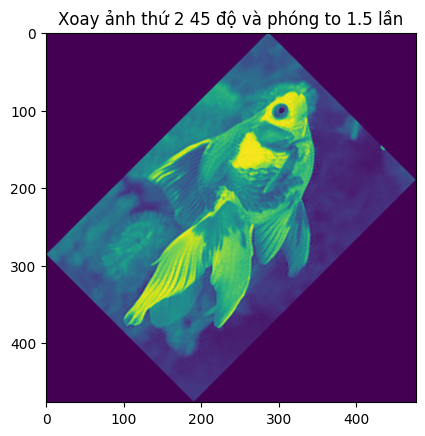

Kích thước ảnh gốc: (1080, 1920, 3)
Kích thước ảnh sau khi zoom: (4320, 7680, 3)


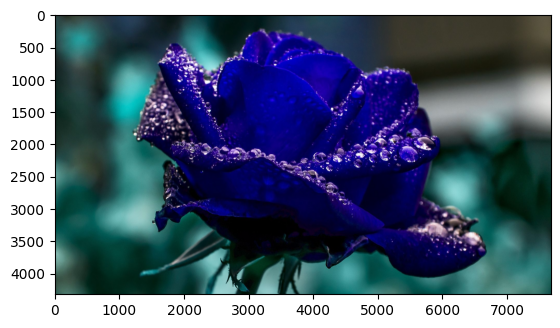

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd

img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')

# Thêm viền đen 20 pixel cho ảnh đầu tiên.
bordered_img1 = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, (0, 0, 0))

plt.imshow(bordered_img1)
plt.show()
# Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần.
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print("Kích thước ảnh gốc:", gray2.shape)
rotated2 = nd.rotate(gray2, 45, reshape=True)
zoomed2 = nd.zoom(rotated2, 1.5)
print("Kích thước ảnh sau khi xoay và phóng to 1.5 lần:", zoomed2.shape)

plt.imshow(zoomed2)
plt.title("Xoay ảnh thứ 2 45 độ và phóng to 1.5 lần")
plt.show()

# Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter
print("Kích thước ảnh gốc:", img3.shape)
img3 = cv2.resize(img3, None, fx=4, fy=4)
print("Kích thước ảnh sau khi zoom:", img3.shape)
img3 = cv2.bilateralFilter(img3, 15, 75, 75)

plt.figure()
plt.imshow(img3)
plt.show()


# Chúc các bạn thi may mắn và đạt điểm 10.